In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
# read in table
df = pd.read_csv('MovieData/Resources/NameTable.csv')
df.head()

,Name,Year,Movie
0,Henry,1915,The Birth of a Nation
1,Lillian,1915,The Birth of a Nation
2,Mae,1915,The Birth of a Nation
3,Miriam,1915,The Birth of a Nation
4,Elizabeth,1917,Cleopatra


In [3]:
# Add empty Data col
df['Data'] = ""
df.head()

,Name,Year,Movie,Data
0,Henry,1915,The Birth of a Nation,
1,Lillian,1915,The Birth of a Nation,
2,Mae,1915,The Birth of a Nation,
3,Miriam,1915,The Birth of a Nation,
4,Elizabeth,1917,Cleopatra,


In [4]:
# in Data store a count of the number of times a name is present
# in the year range x-13 to x+10
for i, row in df.iterrows():
    center = row['Year']
    data = []
    for year in range(center-13,center+11):
        try:
            temp = pd.read_csv('names/yob'+str(year)+'.txt',header=None)
            temp = temp.loc[temp[0]==row['Name']]
            num = temp[2].sum()
            if num == np.nan: num=0
            data.append(num)
        except:
            data.append(0)
    # If a name never appears set value to nan
    if (sum(data)==0): data = np.nan
    df.at[i,'Data'] = data
    #if(i>3):break
df.head()

,Name,Year,Movie,Data
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243..."
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361..."
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124..."
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ..."
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631..."


In [5]:
# Drop rows with empty Data
df.dropna(inplace=True)
df.head()

,Name,Year,Movie,Data
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243..."
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361..."
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124..."
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ..."
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631..."


In [6]:
# Stores the Percent of Change value for each Data value into new col Data Shift
df['Data Shift'] = ""
running = 1
for i,row in df.iterrows():
    #df.at[i,'Data Shift'] = [100 * (b - a) / a for a, b in zip(row['Data'][::1], row['Data'][1::1])]
    df.at[i,'Data Shift'] = pd.Series(row['Data']).pct_change(running)
    #if (i>2):break
df.head()

,Name,Year,Movie,Data,Data Shift
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243...",0 NaN 1 -0.105166 2 0.082474 3...
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361...",0 NaN 1 -0.029909 2 0.055295 3...
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124...",0 NaN 1 -0.061417 2 0.022651 3...
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ...",0 NaN 1 0.090000 2 0.041284 3...
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631...",0 NaN 1 0.074883 2 0.048863 3...


[1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]


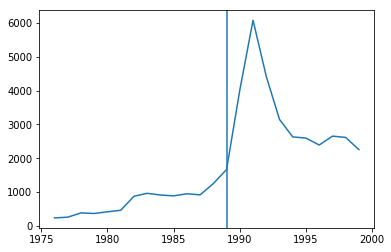

In [21]:
# Cell for Testing purposes
y = 811
x = np.arange(df['Year'][y]-13,df['Year'][y]+11)
print(x)

plt.plot(x,df['Data'][y])
plt.axvline(df['Year'][y])

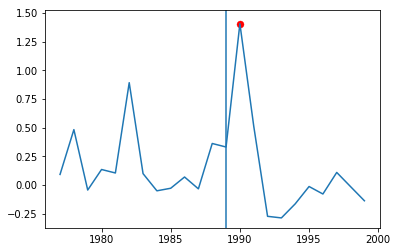

In [23]:
# Cell for test purposes
x = np.arange(df['Year'][y]-13,df['Year'][y]+11)
t = np.array(df['Data Shift'][y].tolist())
#print(t)
c_max_index = argrelextrema(t, np.greater, order=10)
plt.plot(x,df['Data Shift'][y])
plt.axvline(df['Year'][y])
plt.scatter(c_max_index[0]+df['Year'][y]-13,t[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [32]:
# assigns a spike col that looks for spikes in Data Shift and 
# assigns a value based on returned spike relative to year of movie
# -1 small spike before
# -2 Large spike before
# 1 small spike after
# 2 Large spike after
# 0 Spike before and after
df['Spike'] = ""

spikeCheck = 1

for i,row in df.iterrows():
    t = np.array(df['Data Shift'][i].tolist())
    #print(t)
    c = argrelextrema(t, np.greater, order=7)
    #print(f"{t}:{c_max_index[0]}")
    x=0
    if (len(c[0]) <1): continue
    try:
        #print(len(c[0]))
        if(c[0] < 13):
            if(abs(t[c[0]])<spikeCheck):
                x=-1
            else:
                x=-2
        else:
            if(abs(t[c[0]])<spikeCheck):
                x=1
            else:
                x=2
    except ValueError:  # only throws error when spike is before and after year
        #print(len(c[0]))
        pass
    df.at[i,'Spike'] = x
    #if(i>2):break
df.head()

,Name,Year,Movie,Data,Data Shift,Spike
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243...",0 NaN 1 -0.105166 2 0.082474 3...,-1
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361...",0 NaN 1 -0.029909 2 0.055295 3...,1
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124...",0 NaN 1 -0.061417 2 0.022651 3...,-1
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ...",0 NaN 1 0.090000 2 0.041284 3...,-1
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631...",0 NaN 1 0.074883 2 0.048863 3...,-1


In [33]:
# Only Grabs rows with strong Spikes
strong = df.loc[(df['Spike']==2)|(df['Spike']==-2)]

In [38]:
# Creates charts for change of percent
for i,row in strong.iterrows():
    #if(i>2):break
    x = np.arange(df['Year'][i]-13,df['Year'][i]+11)
    t = np.array(df['Data Shift'][i].tolist())
    #print(t)
    c_max_index = argrelextrema(t, np.greater, order=7)
    plt.plot(x,df['Data Shift'][i])
    plt.xlabel('Year')
    plt.ylabel('Change Value')
    plt.title('Change percent of '+df['Name'][i]+" centered on "+df['Movie'][i]+"'s Release'")
    plt.axvline(df['Year'][i],color = 'y')
    plt.scatter(c_max_index[0]+df['Year'][i]-13,t[c_max_index[0]],linewidth=0.3, s=50, c='r')
    title = 'DataCharts/DegreeOfChange/'+str(df['Year'][i])+'_'+df['Name'][i]+'_'+df['Movie'][i].replace(" ","").replace(':','')+'.png'
    #print(title)
    plt.savefig(title)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [39]:
# creates charts for change of name value
for i,row in strong.iterrows():
    x = np.arange(df['Year'][i]-13,df['Year'][i]+11)
    plt.plot(x,df['Data'][i])
    plt.xlabel('Year')
    plt.ylabel('Count of Name')
    plt.title('Count of '+df['Name'][i]+" centered on "+df['Movie'][i]+"'s Release'")
    plt.axvline(df['Year'][i],color = 'y')
    title = 'DataCharts/NameRate/'+str(df['Year'][i])+'_'+df['Name'][i]+'_'+df['Movie'][i].replace(" ","").replace(':','')+'.png'
    #print(title)
    plt.savefig(title)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [37]:
len(strong)

49

In [44]:
m = 0
for s in strong['Data Shift']:
    for v in s:
        if (v>100000): continue
        if (v>m):m=v
print (m)

8.098039215686274
